# 사례를 통해서 배우는 파생 변수 만들기 1편

## 실습 개요

사례를 통해서 배우는 파생 변수 만들기 1편


1) 실습 목적
 * 실제 주가 데이터셋(OHLCV)을 통해서 파생 변수를 만들어 보는 실습을 진행합니다.
 * 금융 & 주식 도메인에서의 전문적인 파생 변수를 알아봅니다.


2) 수강 목표
 * 금융 & 주식 도메인에서의 파생 변수인 이동평균, 볼린저 밴드, MACD 등을 이해할 수 있습니다.
 * 파생 변수가 알고리즘 모델에 미치는 영향을 이해할 수 있습니다.


### 실습 목차
* **1. 주가(OHLCV) 데이터셋 실습 해보기**
  * 실습 데이터 재구성하기
  * 시계열 데이터란?
  * 파생 변수 만들기I (도메인 지식 기반)
  * 파생 변수 만들기II (상장법인정보 기반)
  * 데이터 인코딩 및 결측치 정리


###  데이터셋 개요

* 데이터셋: Yahoo Finance OHLCV 데이터셋이란? (Open High Close Low Volume)
* 데이터셋 개요 : **Yahoo Finance는 주식, 환율과 같은 금융 정보를 제공하는 플랫폼입니다.** 주식과 관련된 정보 및 시각화 정보를 웹사이트를 통해서 제공 (NASDAQ, KOSPI, NIKKEI 등) 됩니다. 데이터는 무료로 사용할 수 있으며, API를 제공하여 손쉽게 데이터를 수집 가능합니다. 또한, Yahoo Finance 정보를 랩핑한 yfinance 패키지를 이용해 파이썬에서도 사용 가능합니다.
  - (O)pen (시가): 주식의 거래가 시작된 가격을 나타냅니다. 시장이 열리면 처음으로 발생한 거래의 가격입니다.
  - (H)igh (고가): 특정 기간 동안 주식의 가격 중 최고점을 나타냅니다. 이는 해당 기간 동안 주식이 얼마나 높게 거래되었는지를 보여줍니다.
  - (C)lose (종가): 주식의 거래가 마감된 가격을 나타냅니다. 시장이 닫힐 때 주식이 어떤 가격으로 거래를 마쳤는지를 보여줍니다.
  - (L)ow (저가): 특정 기간 동안 주식의 가격 중 최저점을 나타냅니다. 이는 해당 기간 동안 주식이 얼마나 낮게 거래되었는지를 보여줍니다.
  - (V)Volume (거래량):  특정 기간 동안 거래된 주식의 총 수량을 나타냅니다. 거래량은 주식 시장에서 매우 중요한 지표 중 하나이며, 주식의 유동성과 관련이 있습니다. 더 높은 거래량은 주식 시장의 활발한 거래를 나타낼 수 있습니다.
  - Change (변동률): 이전 주가와 비교해 변화된 변동률 입니다.
  - code (종목 코드): 종목(회사)를 구분하는 코드입니다.
* 데이터셋 저작권 : Apache Software License (Apache)

In [1]:
# 계산
import numpy as np

# 전처리
from sklearn.preprocessing import LabelEncoder

# 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 출력 및 시각화
import matplotlib.pyplot as plt
import matplotlib.dates as mpdates
import seaborn as sns

from IPython.display import display
from mplfinance.original_flavor import candlestick_ohlc

# 데이터셋 로드 및 정제
import pandas as pd

# 코드 셀 실행 후 경고를 무시
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
OHLCV_data = pd.read_parquet("/home/pervinco/Datasets/OHLCV.parquet")

display(OHLCV_data.head(10))

,Open,High,Low,Close,Volume,Change,code
2018-01-02,51380.0,51400.0,50780.0,51020.0,169485.0,0.001177,005930
2018-01-03,52540.0,52560.0,51420.0,51620.0,200270.0,0.011760,005930
2018-01-04,52120.0,52180.0,50640.0,51080.0,233909.0,-0.010461,005930
2018-01-05,51300.0,52120.0,51200.0,52120.0,189623.0,0.020360,005930
2018-01-08,52400.0,52520.0,51500.0,52020.0,167673.0,-0.001919,005930
2018-01-09,51460.0,51720.0,49980.0,50400.0,360272.0,-0.031142,005930
2018-01-10,50500.0,50520.0,48640.0,48840.0,371336.0,-0.030952,005930
2018-01-11,48200.0,49260.0,48020.0,48240.0,502476.0,-0.012285,005930
2018-01-12,48240.0,48480.0,46760.0,48200.0,545409.0,-0.000829,005930
2018-01-15,48800.0,48980.0,47920.0,48540.0,201920.0,0.007054,005930


In [5]:
# 날짜는 데이터셋의 index로 되어 있습니다.
# .loc을 통해서 날짜 범위를 지정해줍시다.
OHLCV_data = OHLCV_data.sort_index()
OHLCV_data = OHLCV_data.loc["2020-01-01":"2023-07-31"]

display(OHLCV_data.head(10))

,Open,High,Low,Close,Volume,Change,code
2020-01-02,7037.0,7123.0,7018.0,7106.0,13986.0,0.009518,001530
2020-01-02,31400.0,32350.0,31100.0,32100.0,75206.0,0.033816,003350
2020-01-02,7300.0,7450.0,7270.0,7340.0,60800.0,0.009629,005870
2020-01-02,1165.0,1180.0,1160.0,1175.0,117291.0,0.008584,006340
2020-01-02,95100.0,95200.0,91800.0,91900.0,250460.0,-0.035677,010950
2020-01-02,77800.0,78900.0,77200.0,77700.0,3389.0,-0.001285,02826K
2020-01-02,769000.0,771000.0,757000.0,770000.0,1023.0,-0.001297,051905
2020-01-02,11600.0,11750.0,11400.0,11400.0,1549105.0,-0.017241,316140
2020-01-02,427932.0,434356.0,420520.0,423485.0,109563.0,-0.010392,207940
2020-01-02,90400.0,92300.0,89100.0,91900.0,20863.0,0.027964,090435


In [6]:
# 현재 데이터프레임의 인덱스가 날짜로 되어있습니다.
# 분석 편의를 위해서 Date컬럼을 새로 만들고, 인덱스는 새로 초기화 하겠습니다.
OHLCV_data["Date"] = OHLCV_data.index
OHLCV_data.reset_index(drop=True, inplace=True)

display(OHLCV_data)

,Open,High,Low,Close,Volume,Change,code,Date
0,7037.0,7123.0,7018.0,7106.0,13986.0,0.009518,001530,2020-01-02
1,31400.0,32350.0,31100.0,32100.0,75206.0,0.033816,003350,2020-01-02
2,7300.0,7450.0,7270.0,7340.0,60800.0,0.009629,005870,2020-01-02
3,1165.0,1180.0,1160.0,1175.0,117291.0,0.008584,006340,2020-01-02
4,95100.0,95200.0,91800.0,91900.0,250460.0,-0.035677,010950,2020-01-02
...,...,...,...,...,...,...,...,...
827854,22150.0,23600.0,22150.0,22700.0,154696.0,0.024831,000500,2023-07-31
827855,5840.0,5980.0,5790.0,5840.0,84389.0,0.001715,012630,2023-07-31
827856,34500.0,36450.0,34500.0,35850.0,192901.0,0.028694,336370,2023-07-31
827857,1154.0,1185.0,1132.0,1157.0,247674.0,0.003469,006200,2023-07-31


In [7]:
company_data = pd.read_parquet("/home/pervinco/Datasets/Company.parquet")

# 상장법인정보 데이터셋
display(company_data.head(10))

,company,code,industry,products,listing_date,closing_month,region
0,시지트로닉스,429270,반도체 제조업,특화반도체 소자,2023-08-03,12월,전라북도
1,에피바이오텍,446440,자연과학 및 공학 연구개발업,탈모 치료제,2023-07-31,12월,인천광역시
2,조선내화,462520,"내화, 비내화 요업제품 제조업",내화 요업제품,2023-07-28,12월,전라남도
3,에이엘티,172670,반도체 제조업,반도체 테스트 및 패키징(반도체 후공정),2023-07-27,12월,충청북도
4,유안타제14호스팩,450940,금융 지원 서비스업,금융 지원 서비스,2023-07-27,12월,서울특별시
5,파로스아이바이오,388870,자연과학 및 공학 연구개발업,PHI-101 급성골수성백혈병 치료제 및 재발성난소암 치료제,2023-07-27,12월,경기도
6,길교이앤씨,456700,"건축기술, 엔지니어링 및 관련 기술 서비스업",강합성 라멘교,2023-07-26,12월,경상북도
7,버넥트,438700,소프트웨어 개발 및 공급업,산업용 XR 솔루션,2023-07-26,12월,서울특별시
8,뷰티스킨,406820,기타 화학제품 제조업,"화장품 제조, 브랜드, 유통 사업",2023-07-24,12월,인천광역시
9,SK증권제9호스팩,455910,금융 지원 서비스업,기업인수목적회사,2023-07-21,12월,서울특별시


In [8]:
# 두 파일을 결합시켜 OHCLV와 상장법인정보를 함께 볼수 있도록 하겠습니다.
OHLCV_data = pd.merge(OHLCV_data, company_data, on="code", how="inner")
display(OHLCV_data)

,Open,High,Low,Close,Volume,Change,code,Date,company,industry,products,listing_date,closing_month,region
0,7037.0,7123.0,7018.0,7106.0,13986.0,0.009518,001530,2020-01-02,디아이동일,상품 중개업,"면사,화섬사,면포,혼방포,스포츠웨어용 신합섬 제조,도매,수출",1964-01-04,12월,서울특별시
1,31400.0,32350.0,31100.0,32100.0,75206.0,0.033816,003350,2020-01-02,한국화장품제조,기타 화학제품 제조업,"화장품(OEM,ODM)",1978-02-06,12월,서울특별시
2,7300.0,7450.0,7270.0,7340.0,60800.0,0.009629,005870,2020-01-02,휴니드테크놀러지스,통신 및 방송 장비 제조업,"무선통신기기,군납용무전기,위성방송수신기 제조",1991-09-03,12월,인천광역시
3,1165.0,1180.0,1160.0,1175.0,117291.0,0.008584,006340,2020-01-02,대원전선,절연선 및 케이블 제조업,"전선,통신케이블,무선통신장비,합성수지 제조,도매/부동산 매매,임대",1988-05-04,12월,충청남도
4,95100.0,95200.0,91800.0,91900.0,250460.0,-0.035677,010950,2020-01-02,S-Oil,석유 정제품 제조업,"석유제품,가스,윤활기유,윤활유,그리스,석유화학제품 제조,도매",1987-05-27,12월,서울특별시
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714586,22150.0,23600.0,22150.0,22700.0,154696.0,0.024831,000500,2023-07-31,가온전선,절연선 및 케이블 제조업,"전력선,통신케이블 제조,도매,수출입",1987-06-08,12월,경기도
714587,5840.0,5980.0,5790.0,5840.0,84389.0,0.001715,012630,2023-07-31,HDC,기타 금융업,"토목공사,건축공사,아파트분양사업,재개발/재건축사업",1996-10-16,12월,서울특별시
714588,34500.0,36450.0,34500.0,35850.0,192901.0,0.028694,336370,2023-07-31,솔루스첨단소재,전자부품 제조업,"동박, 유압기기 등",2019-10-18,12월,전라북도
714589,1154.0,1185.0,1132.0,1157.0,247674.0,0.003469,006200,2023-07-31,한국전자홀딩스,기타 금융업,"시장조사,경영컨설팅",1979-11-30,12월,서울특별시


In [9]:
# 컬럼이 너무 많아 데이터프레임 출력이 불편하니, 불필요한 컬럼을 제외하는 함수를 하나 만들겠습니다.
except_cols = ["industry", "products", "listing_date", "closing_month", "region"]
def get_display_cols(except_cols):
    return [col for col in OHLCV_data.columns if col not in except_cols]

display_cols = get_display_cols(except_cols)

In [10]:
# 이번 강의에서는 파생 변수를 제작하는 것 외에도,
# 다음날 종가(Close)를 예측하기 위한 정답(Target)값도 제작할거에요.
# 종목(code)로 집계 후 다음날 종가(Close)를 Target 변수에 삽입하도록 하겠습니다.
OHLCV_data["Target"] = OHLCV_data.groupby("code")["Close"].shift(-1)
display(OHLCV_data[display_cols])

,Open,High,Low,Close,Volume,Change,code,Date,company
0,7037.0,7123.0,7018.0,7106.0,13986.0,0.009518,001530,2020-01-02,디아이동일
1,31400.0,32350.0,31100.0,32100.0,75206.0,0.033816,003350,2020-01-02,한국화장품제조
2,7300.0,7450.0,7270.0,7340.0,60800.0,0.009629,005870,2020-01-02,휴니드테크놀러지스
3,1165.0,1180.0,1160.0,1175.0,117291.0,0.008584,006340,2020-01-02,대원전선
4,95100.0,95200.0,91800.0,91900.0,250460.0,-0.035677,010950,2020-01-02,S-Oil
...,...,...,...,...,...,...,...,...,...
714586,22150.0,23600.0,22150.0,22700.0,154696.0,0.024831,000500,2023-07-31,가온전선
714587,5840.0,5980.0,5790.0,5840.0,84389.0,0.001715,012630,2023-07-31,HDC
714588,34500.0,36450.0,34500.0,35850.0,192901.0,0.028694,336370,2023-07-31,솔루스첨단소재
714589,1154.0,1185.0,1132.0,1157.0,247674.0,0.003469,006200,2023-07-31,한국전자홀딩스


#### 👨‍💻 코드 : (1-3)
- 첫번째 파생 변수는 주가의 가격 차이 (변동폭)입니다.
- 가격 차이는 고가 (High) - 저가 (Low)로 간단히 계산할 수 있는 단일 상호작용 파생 변수 입니다.
- 가격의 변동성이 일정 수준 넘어설 때 매매 포지션을 취하는 변동성 돌파 전략 (Volatility Breakout Strategy)에 활용됩니다.
<br>
<br>
$$
가격\,차이 = 고가 - 저가
$$  

In [11]:
# 가격 차이를 구합시다.
OHLCV_data["PriceRange"] = OHLCV_data["High"] - OHLCV_data["Low"]

display_cols = get_display_cols(except_cols)
display(OHLCV_data[display_cols])

,Open,High,Low,Close,Volume,Change,code,Date,company,Target,PriceRange
0,7037.0,7123.0,7018.0,7106.0,13986.0,0.009518,001530,2020-01-02,디아이동일,7077.0,105.0
1,31400.0,32350.0,31100.0,32100.0,75206.0,0.033816,003350,2020-01-02,한국화장품제조,31550.0,1250.0
2,7300.0,7450.0,7270.0,7340.0,60800.0,0.009629,005870,2020-01-02,휴니드테크놀러지스,7350.0,180.0
3,1165.0,1180.0,1160.0,1175.0,117291.0,0.008584,006340,2020-01-02,대원전선,1160.0,20.0
4,95100.0,95200.0,91800.0,91900.0,250460.0,-0.035677,010950,2020-01-02,S-Oil,93500.0,3400.0
...,...,...,...,...,...,...,...,...,...,...,...
714586,22150.0,23600.0,22150.0,22700.0,154696.0,0.024831,000500,2023-07-31,가온전선,NaN,1450.0
714587,5840.0,5980.0,5790.0,5840.0,84389.0,0.001715,012630,2023-07-31,HDC,NaN,190.0
714588,34500.0,36450.0,34500.0,35850.0,192901.0,0.028694,336370,2023-07-31,솔루스첨단소재,NaN,1950.0
714589,1154.0,1185.0,1132.0,1157.0,247674.0,0.003469,006200,2023-07-31,한국전자홀딩스,NaN,53.0


- **다음 파생 변수는 평균 가격입니다.**
- 일 단위로 종목별 평균을 구할 수 있습니다.
- 주가의 전반적인 흐름을 이해하는데 필요한 대푯값입니다.
<br>
<br>
$$
평균 가격 = (시가 + 고가 + 저가 + 종가) / 4
$$  

In [12]:
# 종목의 대푯값인 평균 가격를 구합시다.
OHLCV_data["AveragePrice"] = (OHLCV_data["Open"] + OHLCV_data["High"] + OHLCV_data["Low"] + OHLCV_data["Close"]) / 4

display_cols = get_display_cols(except_cols)
display(OHLCV_data[display_cols])

,Open,High,Low,Close,Volume,Change,code,Date,company,Target,PriceRange,AveragePrice
0,7037.0,7123.0,7018.0,7106.0,13986.0,0.009518,001530,2020-01-02,디아이동일,7077.0,105.0,7071.0
1,31400.0,32350.0,31100.0,32100.0,75206.0,0.033816,003350,2020-01-02,한국화장품제조,31550.0,1250.0,31737.5
2,7300.0,7450.0,7270.0,7340.0,60800.0,0.009629,005870,2020-01-02,휴니드테크놀러지스,7350.0,180.0,7340.0
3,1165.0,1180.0,1160.0,1175.0,117291.0,0.008584,006340,2020-01-02,대원전선,1160.0,20.0,1170.0
4,95100.0,95200.0,91800.0,91900.0,250460.0,-0.035677,010950,2020-01-02,S-Oil,93500.0,3400.0,93500.0
...,...,...,...,...,...,...,...,...,...,...,...,...
714586,22150.0,23600.0,22150.0,22700.0,154696.0,0.024831,000500,2023-07-31,가온전선,NaN,1450.0,22650.0
714587,5840.0,5980.0,5790.0,5840.0,84389.0,0.001715,012630,2023-07-31,HDC,NaN,190.0,5862.5
714588,34500.0,36450.0,34500.0,35850.0,192901.0,0.028694,336370,2023-07-31,솔루스첨단소재,NaN,1950.0,35325.0
714589,1154.0,1185.0,1132.0,1157.0,247674.0,0.003469,006200,2023-07-31,한국전자홀딩스,NaN,53.0,1157.0


- 이번에는 주가의 방향을 구해볼까요?
- 종가(Close)가 시가(Open)에 비해 어떻게 변화되었는지 간단하게 알아 볼수 있습니다.
- 종가가 시가보다 크면 주가의 방향은 양(1)으로, 반대로 종가가 시가보다 작으면 음(-1)을 표현하도록 하겠습니다.
<br>
<br>

$$
\begin {align}
&if \; \text{종가} > \text{시가} \; \text{Then} \; 1 \\
&Else \; \text{Then} \; -1
\end {align}
$$

In [13]:
OHLCV_data['PriceDirection'] = OHLCV_data.apply(lambda row: 1 if row['Close'] > row['Open'] else -1, axis=1)

display_cols = get_display_cols(except_cols)
display(OHLCV_data[display_cols])

,Open,High,Low,Close,Volume,Change,code,Date,company,Target,PriceRange,AveragePrice,PriceDirection
0,7037.0,7123.0,7018.0,7106.0,13986.0,0.009518,001530,2020-01-02,디아이동일,7077.0,105.0,7071.0,1
1,31400.0,32350.0,31100.0,32100.0,75206.0,0.033816,003350,2020-01-02,한국화장품제조,31550.0,1250.0,31737.5,1
2,7300.0,7450.0,7270.0,7340.0,60800.0,0.009629,005870,2020-01-02,휴니드테크놀러지스,7350.0,180.0,7340.0,1
3,1165.0,1180.0,1160.0,1175.0,117291.0,0.008584,006340,2020-01-02,대원전선,1160.0,20.0,1170.0,1
4,95100.0,95200.0,91800.0,91900.0,250460.0,-0.035677,010950,2020-01-02,S-Oil,93500.0,3400.0,93500.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
714586,22150.0,23600.0,22150.0,22700.0,154696.0,0.024831,000500,2023-07-31,가온전선,NaN,1450.0,22650.0,1
714587,5840.0,5980.0,5790.0,5840.0,84389.0,0.001715,012630,2023-07-31,HDC,NaN,190.0,5862.5,-1
714588,34500.0,36450.0,34500.0,35850.0,192901.0,0.028694,336370,2023-07-31,솔루스첨단소재,NaN,1950.0,35325.0,1
714589,1154.0,1185.0,1132.0,1157.0,247674.0,0.003469,006200,2023-07-31,한국전자홀딩스,NaN,53.0,1157.0,1



- 주식에서 중요하게 여겨지는 개념이 "복리" 입니다.
- 주식은 복리의 마법이 존재하는 시장입니다. 일일 수익률이 지속적으로 상승한다면 투자 수익금이 기하급수적으로 올라가게 됩니다.
- 자신이 보유한 주식의 일일 수익률을 바탕으로 추후 복리를 계산해 장기적인 미래 수익률을 볼수도 있겠죠.
- 또한, 과거 특정 종목의 일일 수익률을 분석해 인사이트를 얻을 수도 있습니다.
- **파생 변수로 "일일 수익률"을 구해보도록 하겠습니다.**

$$
일일 수익률 = \left(\frac{다음날 종가-현재 종가}{현재 종가}\right) * 100
$$

<br>
<center>or</center>
<br>

$$
일일 수익률 = ((다음날 종가 - 현재 종가) - 1) * 100
$$





In [14]:
# 일일 수익률은 두가지 방법으로 계산할 수 있습니다.
# 첫번째는 수식을 직접 명시하는 방법입니다.
display(
    ((OHLCV_data["Close"] / OHLCV_data["Close"].shift(1)) - 1) * 100
)

0                 NaN
1          351.730932
2          -77.133956
3          -83.991826
4         7721.276596
             ...     
714586     144.875944
714587     -74.273128
714588     513.869863
714589     -96.772664
714590    3024.459810
Name: Close, Length: 714591, dtype: float64

In [15]:
# 두번째 방법은 pct_chage 기능을 이용하는 것입니다.
# pct_chage는 행과 행사이의 차이를 구하는 기능입니다.

# 두 방법 모두 결과는 동일합니다.
OHLCV_data["DailyReturn"] = OHLCV_data["Close"].pct_change() * 100

display_cols = get_display_cols(except_cols)
display(OHLCV_data[display_cols])

,Open,High,Low,Close,Volume,Change,code,Date,company,Target,PriceRange,AveragePrice,PriceDirection,DailyReturn
0,7037.0,7123.0,7018.0,7106.0,13986.0,0.009518,001530,2020-01-02,디아이동일,7077.0,105.0,7071.0,1,NaN
1,31400.0,32350.0,31100.0,32100.0,75206.0,0.033816,003350,2020-01-02,한국화장품제조,31550.0,1250.0,31737.5,1,351.730932
2,7300.0,7450.0,7270.0,7340.0,60800.0,0.009629,005870,2020-01-02,휴니드테크놀러지스,7350.0,180.0,7340.0,1,-77.133956
3,1165.0,1180.0,1160.0,1175.0,117291.0,0.008584,006340,2020-01-02,대원전선,1160.0,20.0,1170.0,1,-83.991826
4,95100.0,95200.0,91800.0,91900.0,250460.0,-0.035677,010950,2020-01-02,S-Oil,93500.0,3400.0,93500.0,-1,7721.276596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714586,22150.0,23600.0,22150.0,22700.0,154696.0,0.024831,000500,2023-07-31,가온전선,NaN,1450.0,22650.0,1,144.875944
714587,5840.0,5980.0,5790.0,5840.0,84389.0,0.001715,012630,2023-07-31,HDC,NaN,190.0,5862.5,-1,-74.273128
714588,34500.0,36450.0,34500.0,35850.0,192901.0,0.028694,336370,2023-07-31,솔루스첨단소재,NaN,1950.0,35325.0,1,513.869863
714589,1154.0,1185.0,1132.0,1157.0,247674.0,0.003469,006200,2023-07-31,한국전자홀딩스,NaN,53.0,1157.0,1,-96.772664


- **⛔ 만들고 보니 너무 쉽지않나요? 근데 이렇게 구하시면 안됩니다! ⛔**
- 종목(code)컬럼이 존재하기 때문에 종목별로 따로 집계하여 일일 수익률을 구해야합니다. 아래처럼요.

In [16]:
OHLCV_data['DailyReturn'] = OHLCV_data.groupby('code')['Close'].transform(lambda x: x.pct_change() * 100)

- **다음 파생 변수는 이동평균(Moving average)입니다.**
- 주식 투자자들이 종목 분석을 진행할 때 주식 차트라는 것을 보게됩니다.
- 이때 차트에서 이동평균선을 기반으로 많이 추세를 파악합니다. 주로 이평선이라고도 불립니다.
- **이동평균을 중요시하는 이유는 주가의 전반적인 추세를 말끔하게 볼수 있다는 장점이 있습니다.**
- 또한, 이동평균을 바탕으로 파생되는 주식 분석에 중요한 여러 중요한 이론들이 존재합니다.
<br>
<br>
$$
이동평균(SMA_{n}) = \frac{종가_{1}+종가_{2}+종가_{3} +...+종가_{n}}{n}
$$
<br>
<br>
- 위의 식처럼 **이동평균은 특정 기간의 종가의 평균값을 계산한 결과입니다.**
- 이동평균은 크게 **단순 이동평균 (Simple Moving Average, SMA)**와 **지수 이동평균(Exponential Moving Average, EMA)**로 나뉩니다.
- 지수 이동평균은 뒤에서 다시 다뤄보도록 하고, 여기서는 단순 이동평균으로 파생 변수를 만들어 보겠습니다.

In [17]:
# 이동 평균은 rolling 기능을 이용해 쉽게 구할 수 있습니다.
# rolling은 윈도우(기간)을 설정하여 특정 연산을 할수 있습니다.
# window는 몇일 간의 이동 평균을 구할지 설정하는 파라미터입니다.
display("예) 20일간의 종가 합산")
display(OHLCV_data["Close"].rolling(window=20).sum())

'예) 20일간의 종가 합산'

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
714586    648156.0
714587    645066.0
714588    667426.0
714589    659613.0
714590    646663.0
Name: Close, Length: 714591, dtype: float64

In [18]:
# mean으로 바꿔주면 20일간의 이동평균이 됩니다.
display("20일간의 이동평균")
display(OHLCV_data["Close"].rolling(window=20).mean())

'20일간의 이동평균'

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
714586    32407.80
714587    32253.30
714588    33371.30
714589    32980.65
714590    32333.15
Name: Close, Length: 714591, dtype: float64

- 이동평균은 주로 5일, 20일, 60일, 120일로 설정하여 분석합니다.
- **보통은 5일, 20일은 "단기 이동평균", 60일은 "중기 이동평균", 120일은 "장기 이동평균"이라 합니다.**
- 중·장기 이동 평균은 단기 적인 주가에 의한 변화가 둔합니다. 이 때문에 주가의 대세를 장기적으로 판단할 수 있습니다.
- 반대로 단기 이동 평균은 시세의 전환을 빠르게 파악할 수 있으므로 주가의 약한 변동에도 민감하게 반응합니다.
- 우리는 파생 변수로 이 모든것을 만들어 보겠습니다. :)

In [19]:
# 5일, 20일, 60일, 120일의 이동평균을 계산합니다.
OHLCV_data["MovingAverage5d"] = OHLCV_data.groupby("code")["Close"].transform(lambda x: x.rolling(window=5).mean())
OHLCV_data["MovingAverage20d"] = OHLCV_data.groupby("code")["Close"].transform(lambda x: x.rolling(window=20).mean())
OHLCV_data["MovingAverage60d"] = OHLCV_data.groupby("code")["Close"].transform(lambda x: x.rolling(window=60).mean())
OHLCV_data["MovingAverage120d"] = OHLCV_data.groupby("code")["Close"].transform(lambda x: x.rolling(window=120).mean())

In [20]:
# 과거의 종가를 이용해서 이동평균을 구하기 때문에 첫 부분에는 결측치가 만들어지는 것을 볼수 있습니다.
display_cols = get_display_cols(except_cols)
display(OHLCV_data[display_cols].head(30))

,Open,High,Low,Close,Volume,Change,code,Date,company,Target,PriceRange,AveragePrice,PriceDirection,DailyReturn,MovingAverage5d,MovingAverage20d,MovingAverage60d,MovingAverage120d
0,7037.0,7123.0,7018.0,7106.0,13986.0,0.009518,001530,2020-01-02,디아이동일,7077.0,105.0,7071.00,1,NaN,NaN,NaN,NaN,NaN
1,31400.0,32350.0,31100.0,32100.0,75206.0,0.033816,003350,2020-01-02,한국화장품제조,31550.0,1250.0,31737.50,1,NaN,NaN,NaN,NaN,NaN
2,7300.0,7450.0,7270.0,7340.0,60800.0,0.009629,005870,2020-01-02,휴니드테크놀러지스,7350.0,180.0,7340.00,1,NaN,NaN,NaN,NaN,NaN
3,1165.0,1180.0,1160.0,1175.0,117291.0,0.008584,006340,2020-01-02,대원전선,1160.0,20.0,1170.00,1,NaN,NaN,NaN,NaN,NaN
4,95100.0,95200.0,91800.0,91900.0,250460.0,-0.035677,010950,2020-01-02,S-Oil,93500.0,3400.0,93500.00,-1,NaN,NaN,NaN,NaN,NaN
5,11600.0,11750.0,11400.0,11400.0,1549105.0,-0.017241,316140,2020-01-02,우리금융지주,11300.0,350.0,11537.50,-1,NaN,NaN,NaN,NaN,NaN
6,427932.0,434356.0,420520.0,423485.0,109563.0,-0.010392,207940,2020-01-02,삼성바이오로직스,417061.0,13836.0,426573.25,-1,NaN,NaN,NaN,NaN,NaN
7,2030.0,2040.0,2010.0,2025.0,4427.0,-0.002463,002220,2020-01-02,한일철강,2025.0,30.0,2026.25,-1,NaN,NaN,NaN,NaN,NaN
8,29300.0,30750.0,29300.0,30550.0,50039.0,0.035593,063160,2020-01-02,종근당바이오,30150.0,1450.0,29975.00,1,NaN,NaN,NaN,NaN,NaN
9,55500.0,56000.0,55000.0,55200.0,12993228.0,-0.010753,005930,2020-01-02,삼성전자,55500.0,1000.0,55425.00,-1,NaN,NaN,NaN,NaN,NaN


In [21]:
# 결측치 들이 많이 생겼기 때문에 결측치들을 모두 제거해주겠습니다.
samsung_data = OHLCV_data[OHLCV_data["code"] == "005930"].copy()
samsung_data = samsung_data[
    samsung_data["MovingAverage5d"].notnull() &
    samsung_data["MovingAverage20d"].notnull() &
    samsung_data["MovingAverage60d"].notnull() &
    samsung_data["MovingAverage120d"].notnull()
]

In [22]:
# 오늘이 2023-03-01이라고 가정하겠습니다.
# 2023-01-01 ~ 2023-03-01까지의 데이터를 보죠.
samsung_data = samsung_data[(samsung_data["Date"] >= "2023-03-01") & (samsung_data["Date"] <= "2023-03-31")]

# 날짜 형식을 숫자로 변환해야 시각화를 하기 수월합니다.
samsung_data["Date"] = samsung_data["Date"].map(mpdates.date2num)

# 차트를 그리기 위해서 필요한 데이터만 뽑아 보아요.
samsung_data = samsung_data[
    [
        "Date",
        "Open",
        "High",
        "Low",
        "Close",
        "MovingAverage5d",
        "MovingAverage20d",
        "MovingAverage60d",
        "MovingAverage120d",
    ]
]

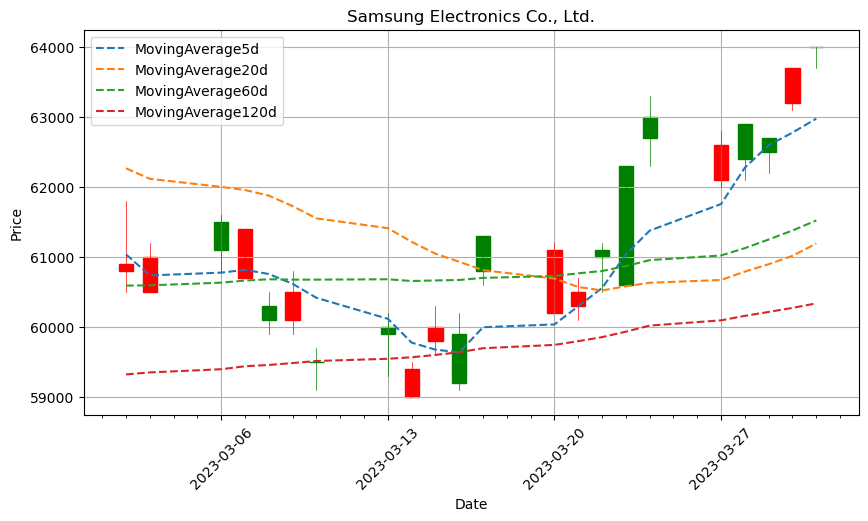

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))

# 아래 함수를 이용해 캔들차트를 그릴 수 있습니다.
candlestick_ohlc(ax, samsung_data.values, width=0.6, colorup="g", colordown="r")

# X 축에 주간 구분선을 추가 하겠습니다.
ax.xaxis.set_major_locator(mpdates.WeekdayLocator(mpdates.MONDAY))
ax.xaxis.set_minor_locator(mpdates.DayLocator())

# 아까 숫자로 변환한 날짜 데이터를 보기 좋게 형식 변환을 합시다.
ax.xaxis.set_major_formatter(mpdates.DateFormatter("%Y-%m-%d"))

# 반복문을 통해 이동평균선을 그려줍니다.
for col in [
    "MovingAverage5d",
    "MovingAverage20d",
    "MovingAverage60d",
    "MovingAverage120d",
]:
    ax.plot(samsung_data["Date"], samsung_data[col], label=col, linestyle="--")


# 필요한 범례들을 작성해 줍시다.
plt.title("Samsung Electronics Co., Ltd.")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()


- 이제 이동평균을 파생 변수로 만들어냈으니, 이에 기반한 여러 기술들을 제작해봅시다.
- **볼린저 밴드(Bollinger bands)는 이동평균을 기준으로 상한(Upper), 하한(Lower) 밴드를 구성하여 추세와 변동성을 파악하는 기술입니다.**
- 1980년대 후반 존 볼린저가 발명하였고, 주식 기술 분석에서 많이 활용되는 보조지표입니다.
- 일반적으로 20일 이동평균에 2배의 표준편차를 더하거나 빼서 구하게 됩니다.

<br>
<br>

$$
상단~볼린저~밴드 = 20일~이동평균 +(k \times 표준편차)
$$

<br>
<br>

$$
하단~볼린저~밴드 = 20일~이동평균 -(k \times 표준편차)
$$

<br>
<br>

- 볼린저 밴드를 계산해보고, 위의 이동평균선과 같이 차트로 만들어 보도록 하겠습니다.

In [24]:
# 표준편차에 대한 상한 및 하한 밴드의 배수 설정
std_multiplier = 2

std = OHLCV_data.groupby("code")["Close"].transform(lambda x: x.rolling(window=20).std())

# 상한은 일반적으로 20일 이동평균에 2배의 표준편차 더하기
# 하한은 일반적으로 20일 이동평균에 2배의 표준편차 빼기
OHLCV_data["UpperBollingerBand"] = OHLCV_data["MovingAverage20d"] + (std_multiplier * std)
OHLCV_data["LowerBollingerBand"] = OHLCV_data["MovingAverage20d"] - (std_multiplier * std)

In [25]:
# 결측치 들이 많이 생겼기 때문에 결측치들을 모두 제거해주겠습니다.
samsung_data = OHLCV_data[OHLCV_data["code"] == "005930"].copy()
samsung_data = samsung_data[
    samsung_data["MovingAverage5d"].notnull() &
    samsung_data["MovingAverage20d"].notnull() &
    samsung_data["MovingAverage60d"].notnull() &
    samsung_data["LowerBollingerBand"].notnull() &
    samsung_data["UpperBollingerBand"].notnull()
]

In [26]:
# 오늘이 2023-03-01이라고 가정하겠습니다.
# 2023-01-01 ~ 2023-03-01까지의 데이터를 보죠.
samsung_data = samsung_data[(samsung_data["Date"] >= "2023-03-01") & (samsung_data["Date"] <= "2023-03-31")]

# 날짜 형식을 숫자로 변환해야 시각화를 하기 수월합니다.
samsung_data["Date"] = samsung_data["Date"].map(mpdates.date2num)

# 차트를 그리기 위해서 필요한 데이터만 뽑아 보아요.
samsung_data = samsung_data[
    [
        "Date",
        "Open",
        "High",
        "Low",
        "Close",
        "MovingAverage5d",
        "MovingAverage20d",
        "MovingAverage60d",
        "MovingAverage120d",
        "LowerBollingerBand",
        "UpperBollingerBand",
    ]
]

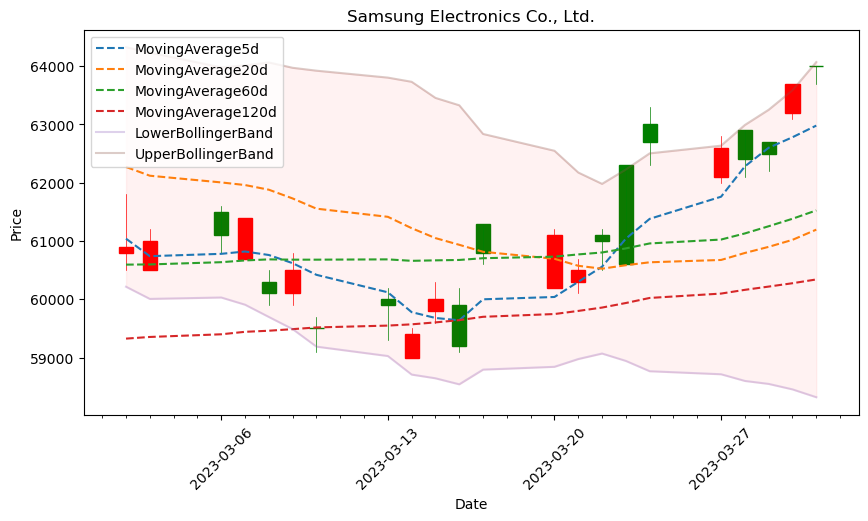

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))

# 아래 함수를 이용해 캔들차트를 그릴 수 있습니다.
candlestick_ohlc(ax, samsung_data.values, width=0.6, colorup="g", colordown="r")

# X 축에 주간 구분선을 추가 하겠습니다.
ax.xaxis.set_major_locator(mpdates.WeekdayLocator(mpdates.MONDAY))
ax.xaxis.set_minor_locator(mpdates.DayLocator())

# 아까 숫자로 변환한 날짜 데이터를 보기 좋게 형식 변환을 합시다.
ax.xaxis.set_major_formatter(mpdates.DateFormatter("%Y-%m-%d"))

# 반복문을 통해 이동평균선을 그려줍니다.
for col in [
    "MovingAverage5d",
    "MovingAverage20d",
    "MovingAverage60d",
    "MovingAverage120d",
]:
    ax.plot(samsung_data["Date"], samsung_data[col], label=col, linestyle="--")

for col in [
    "LowerBollingerBand",
    "UpperBollingerBand",
]:
    ax.plot(samsung_data["Date"], samsung_data[col], label=col, alpha=0.3)

# 볼린저 밴드를 위해 투명도를 가진 색을 채워놓도록 하겠습니다.
plt.fill_between(
    samsung_data["Date"],
    samsung_data["LowerBollingerBand"],
    samsung_data["UpperBollingerBand"],
    color="red",
    alpha=0.05,
)


# 필요한 범례들을 작성해 줍시다.
plt.title("Samsung Electronics Co., Ltd.")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend()

plt.show()


- 볼린저 밴드까지 완성하여 시각화를 하니 실제 주식 차트에서 보는 것과 유사해 보입니다.
- 볼린저 밴드의 영역이 좁으면 주가의 변동성이 낮다는 것을 의미하고, 넓으면 변동성이 높다는 것을 의미합니다.
- 이외에도 주가의 추세를 확인하는데 도움을 주는 지표이며, 아래 첨부한 관련 참고자료를 보시는 것을 추천드립니다.

- **이번엔 MACD (Moving Average Convergence & Divergence)라고 불리는 이동평균 수렴&확산 지수도 구해보겠습니다.**
- MACD도 이동평균에서 파생된 기술입니다. "엠에이씨디" 및 "맥디" 라고 발음합니다.
- 장기 지수이동평균과 단기 지수이동평균의 차이를 통해 계산됩니다.
- 주로 주가 추세의 힘과 방향성을 파악하여 매매신호를 잡으려는 목적으로 활용됩니다.
<br>
<br>
$$
MACD = 12일~지수이동평균 - 26일~지수이동평균
$$

- MACD를 계산하려면 지수 이동평균을 알아야합니다.
- 지수 이동평균(Exponential Moving Average, EMA)은 시계열 데이터에서 최근 관측치에 높은 가중치를 주고, 과거 관측치에는 낮은 가중치를 주어 이동평균을 차등 계산하는 방식입니다.
- 12일 & 26일 지수 이동평균도 파생 변수로 함께 추가하도록 하죠.
<br>
<br>
$$
EMA_{t} = \alpha \times Close_{t} + (1 - \alpha) \times EMA_{t-1}
$$


In [28]:
# .ewm를 이용하면 데이터프레임에서 지수가중함수를 손쉽게 제어할 수 있습니다.
# 12일, 26일 각각의 지수가중함수를 구하도록 하겠습니다.
OHLCV_data['ShortEMA'] = OHLCV_data["Close"].ewm(span=12, adjust=False).mean()
OHLCV_data['LongEMA'] = OHLCV_data["Close"].ewm(span=26, adjust=False).mean()

# 지수가중함수의 차를 구해 MACD를 완성 시킵니다.
OHLCV_data['MACD'] = OHLCV_data['ShortEMA'] - OHLCV_data['LongEMA']

In [29]:
# 짜잔! 도메인 지식에 기반한 여러 파생 변수들이 만들어졌습니다!
display_cols = get_display_cols(except_cols)

display(OHLCV_data[display_cols].head(10))

display(display_cols)

,Open,High,Low,Close,Volume,Change,code,Date,company,Target,...,DailyReturn,MovingAverage5d,MovingAverage20d,MovingAverage60d,MovingAverage120d,UpperBollingerBand,LowerBollingerBand,ShortEMA,LongEMA,MACD
0,7037.0,7123.0,7018.0,7106.0,13986.0,0.009518,001530,2020-01-02,디아이동일,7077.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7106.000000,7106.000000,0.000000
1,31400.0,32350.0,31100.0,32100.0,75206.0,0.033816,003350,2020-01-02,한국화장품제조,31550.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10951.230769,8957.407407,1993.823362
2,7300.0,7450.0,7270.0,7340.0,60800.0,0.009629,005870,2020-01-02,휴니드테크놀러지스,7350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10395.656805,8837.599451,1558.057353
3,1165.0,1180.0,1160.0,1175.0,117291.0,0.008584,006340,2020-01-02,대원전선,1160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8977.094219,8269.999492,707.094727
4,95100.0,95200.0,91800.0,91900.0,250460.0,-0.035677,010950,2020-01-02,S-Oil,93500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21734.464339,14464.814344,7269.649995
5,11600.0,11750.0,11400.0,11400.0,1549105.0,-0.017241,316140,2020-01-02,우리금융지주,11300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20144.546749,14237.791060,5906.755689
6,427932.0,434356.0,420520.0,423485.0,109563.0,-0.010392,207940,2020-01-02,삼성바이오로직스,417061.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82196.924172,44552.399129,37644.525043
7,2030.0,2040.0,2010.0,2025.0,4427.0,-0.002463,002220,2020-01-02,한일철강,2025.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69862.781992,41402.221416,28460.560576
8,29300.0,30750.0,29300.0,30550.0,50039.0,0.035593,063160,2020-01-02,종근당바이오,30150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63814.661685,40598.353163,23216.308522
9,55500.0,56000.0,55000.0,55200.0,12993228.0,-0.010753,005930,2020-01-02,삼성전자,55500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62489.329118,41679.956632,20809.372486


['Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Change',
 'code',
 'Date',
 'company',
 'Target',
 'PriceRange',
 'AveragePrice',
 'PriceDirection',
 'DailyReturn',
 'MovingAverage5d',
 'MovingAverage20d',
 'MovingAverage60d',
 'MovingAverage120d',
 'UpperBollingerBand',
 'LowerBollingerBand',
 'ShortEMA',
 'LongEMA',
 'MACD']

#### 📚 자료 : (1-3)

*  [주식의 기원, 유래, 기본원리](https://m.blog.naver.com/chochila/40149313237
) : 주식 기본 설명
*  [주식 단어 모음집](https://blog.hyosung.com/5006) : 주식 기초 단어 익히기
*  [이동평균선의 이해](https://www.hi-ib.com/systemtrade/st02090602.jsp) : 이동평균선을 이해하고 이에따른 투자전략을 세우는 자료
*  [볼린저 밴드의 이해](https://m.blog.naver.com/rmsgud2007/222316784405) : 볼린저 밴드를 깊게 이해할 수 있는 자료
*  [MACD 위키백과](https://namu.wiki/w/MACD) : MACD 설명 자료
*  [지수가중함수](https://wikidocs.net/152787) : Pandas의 지수가중함수에 대해 설명



### 1-4 파생 변수 만들기II (상장법인정보 기반)

> **도메인 지식에 기반해서 파생 변수를 만들어봤으니 이번에는 상장법인정보를 기반해 파생 변수도 만들어볼게요!**<br>
- 상장법인정보에는 **업종(industry), 주요 제품(Products), 상장일(listing_date), 결산월(closing_month), 지역(region)**이 존재합니다.

#### 👨‍💻 코드 : (1-4)
- 통계 기반 파생 변수는 변수들의 통계값을 이용해 제작하게 됩니다.
- 주로 대푯값을 이용하기 때문에 관측값의 상대적 위치를 잘 파악할 수 있는 장점이 있습니다.
- **업종(industry)을 기준으로 Open (시가), High (고가), Low (저가), Close (종가), Volume (거래량) 컬럼의 일별 평균과 중앙값을 파생 변수로 추가할게요!**

In [30]:
# 상장법인정보를 기반해 파생 변수를 만들어보죠!
# 아까 제작한 도메인 지식 기반 파생 변수는 출력하지 않을게요.
except_cols = [
    "DailyReturn", "MovingAverage5d", "MovingAverage20d",
    "MovingAverage60d", "MovingAverage120d", "LowerBollingerBand",
    "UpperBollingerBand", "ShortEMA", "LongEMA", "MACD", "code",
    "PriceRange", "AveragePrice", "PriceDirection", "products"
]
display_cols = get_display_cols(except_cols)

OHLCV_data[display_cols].head(10)

,Open,High,Low,Close,Volume,Change,Date,company,industry,listing_date,closing_month,region,Target
0,7037.0,7123.0,7018.0,7106.0,13986.0,0.009518,2020-01-02,디아이동일,상품 중개업,1964-01-04,12월,서울특별시,7077.0
1,31400.0,32350.0,31100.0,32100.0,75206.0,0.033816,2020-01-02,한국화장품제조,기타 화학제품 제조업,1978-02-06,12월,서울특별시,31550.0
2,7300.0,7450.0,7270.0,7340.0,60800.0,0.009629,2020-01-02,휴니드테크놀러지스,통신 및 방송 장비 제조업,1991-09-03,12월,인천광역시,7350.0
3,1165.0,1180.0,1160.0,1175.0,117291.0,0.008584,2020-01-02,대원전선,절연선 및 케이블 제조업,1988-05-04,12월,충청남도,1160.0
4,95100.0,95200.0,91800.0,91900.0,250460.0,-0.035677,2020-01-02,S-Oil,석유 정제품 제조업,1987-05-27,12월,서울특별시,93500.0
5,11600.0,11750.0,11400.0,11400.0,1549105.0,-0.017241,2020-01-02,우리금융지주,기타 금융업,2019-02-13,12월,서울특별시,11300.0
6,427932.0,434356.0,420520.0,423485.0,109563.0,-0.010392,2020-01-02,삼성바이오로직스,기초 의약물질 및 생물학적 제제 제조업,2016-11-10,12월,인천광역시,417061.0
7,2030.0,2040.0,2010.0,2025.0,4427.0,-0.002463,2020-01-02,한일철강,1차 철강 제조업,1988-10-07,12월,서울특별시,2025.0
8,29300.0,30750.0,29300.0,30550.0,50039.0,0.035593,2020-01-02,종근당바이오,의약품 제조업,2001-12-11,12월,서울특별시,30150.0
9,55500.0,56000.0,55000.0,55200.0,12993228.0,-0.010753,2020-01-02,삼성전자,통신 및 방송 장비 제조업,1975-06-11,12월,경기도,55500.0


In [31]:
# OHLCV컬럼 모두 업종별로 일일 평균, 중앙값을 집계해보겠습니다.
# 일별, 업종별로 집계를 해야하기 때문에 두개의 변수(Date, industry)가 집계요소로 들어갑니다.

# 일별 시가의 평균, 중앙값
open_stats = OHLCV_data.groupby(["Date", "industry"])["Open"].agg(["mean", "median"])
open_stats.columns = ["OpenMean", "OpenMedian"]
OHLCV_data = pd.merge(OHLCV_data, open_stats, how="inner", on=["industry", "Date"])

# 일별 고가의 평균, 중앙값
high_stats = OHLCV_data.groupby(["Date", "industry"])["High"].agg(["mean", "median"])
high_stats.columns = ["HighMean", "HighMedian"]
OHLCV_data = pd.merge(OHLCV_data, high_stats, how="inner", on=["industry", "Date"])

# 일별 저가의 평균, 중앙값
low_stats = OHLCV_data.groupby(["Date", "industry"])["Low"].agg(["mean", "median"])
low_stats.columns = ["LowMean", "LowMedian"]
OHLCV_data = pd.merge(OHLCV_data, low_stats, how="inner", on=["industry", "Date"])

# 일별 종가의 평균, 중앙값
close_stats = OHLCV_data.groupby(["Date", "industry"])["Close"].agg(["mean", "median"])
close_stats.columns = ["CloseMean", "CloseMedian"]
OHLCV_data = pd.merge(OHLCV_data, close_stats, how="inner", on=["industry", "Date"])

# 일별 거래량의 평균, 중앙값
volume_stats = OHLCV_data.groupby(["Date", "industry"])["Volume"].agg(["mean", "median"])
volume_stats.columns = ["VolumeMean", "VolumeMedian"]
OHLCV_data = pd.merge(OHLCV_data, volume_stats, how="inner", on=["industry", "Date"])

In [32]:
display_cols = get_display_cols(except_cols)

OHLCV_data[display_cols].head(10)

,Open,High,Low,Close,Volume,Change,Date,company,industry,listing_date,...,OpenMean,OpenMedian,HighMean,HighMedian,LowMean,LowMedian,CloseMean,CloseMedian,VolumeMean,VolumeMedian
0,7037.0,7123.0,7018.0,7106.0,13986.0,0.009518,2020-01-02,디아이동일,상품 중개업,1964-01-04,...,10744.250000,11043.5,10890.750000,11161.5,10589.500000,10909.0,10706.500000,11053.0,5.537198e+05,162842.0
1,31400.0,32350.0,31100.0,32100.0,75206.0,0.033816,2020-01-02,한국화장품제조,기타 화학제품 제조업,1978-02-06,...,72429.200000,20750.0,73806.866667,20825.0,71697.933333,20425.0,80132.000000,22475.0,1.974424e+05,79200.5
2,7300.0,7450.0,7270.0,7340.0,60800.0,0.009629,2020-01-02,휴니드테크놀러지스,통신 및 방송 장비 제조업,1991-09-03,...,27950.833333,17990.0,28370.666667,18814.5,27719.666667,17975.0,28013.833333,18700.0,2.289465e+06,182301.0
3,1165.0,1180.0,1160.0,1175.0,117291.0,0.008584,2020-01-02,대원전선,절연선 및 케이블 제조업,1988-05-04,...,7691.000000,4462.5,7743.500000,4560.0,7242.250000,4452.5,7308.250000,4555.0,8.378625e+04,80195.5
4,95100.0,95200.0,91800.0,91900.0,250460.0,-0.035677,2020-01-02,S-Oil,석유 정제품 제조업,1987-05-27,...,130407.600000,95100.0,130626.000000,95200.0,127271.600000,91800.0,127757.600000,91900.0,1.049340e+05,50843.0
5,11600.0,11750.0,11400.0,11400.0,1549105.0,-0.017241,2020-01-02,우리금융지주,기타 금융업,2019-02-13,...,37003.783333,24688.0,37255.716667,25025.0,36216.550000,24383.5,36562.133333,24875.0,2.206515e+05,67127.0
6,427932.0,434356.0,420520.0,423485.0,109563.0,-0.010392,2020-01-02,삼성바이오로직스,기초 의약물질 및 생물학적 제제 제조업,2016-11-10,...,153184.000000,88272.0,155296.500000,89285.0,150108.000000,85876.0,151873.250000,87889.0,4.025870e+05,389662.5
7,2030.0,2040.0,2010.0,2025.0,4427.0,-0.002463,2020-01-02,한일철강,1차 철강 제조업,1988-10-07,...,19102.361111,5690.0,19303.055556,5735.0,18783.111111,5600.0,18948.027778,5690.0,1.342190e+05,44054.5
8,29300.0,30750.0,29300.0,30550.0,50039.0,0.035593,2020-01-02,종근당바이오,의약품 제조업,2001-12-11,...,33427.195122,15693.0,33643.512195,15840.0,32829.317073,15500.0,33162.317073,15791.0,4.230732e+05,53469.0
9,55500.0,56000.0,55000.0,55200.0,12993228.0,-0.010753,2020-01-02,삼성전자,통신 및 방송 장비 제조업,1975-06-11,...,27950.833333,17990.0,28370.666667,18814.5,27719.666667,17975.0,28013.833333,18700.0,2.289465e+06,182301.0


- 이번엔 시간관련 파생 변수에요.
- 시간과 관련된 컬럼은 주가가 생성된 날짜를 나타내는 Date컬럼과 상장일을 나타내는 listing_date, 그리고 결산월인 closing_month 입니다.
- 하나하나 변수를 같이 제작해봅시다!

In [33]:
# Date, listing_date컬럼은 "2020-01-01" 형태로 되어있어요.
# 이걸 컴퓨터가 인식할 수 있도록 년,월,일 정수 컬럼으로 나눠서 표현해볼게요.

# Date컬럼 나누기
OHLCV_data["DateYear"] = OHLCV_data["Date"].dt.year
OHLCV_data["DateMonth"] = OHLCV_data["Date"].dt.month
OHLCV_data["DateDay"] = OHLCV_data["Date"].dt.day

# listing_date컬럼 나누기
OHLCV_data["ListingDateYear"] = OHLCV_data["listing_date"].dt.year
OHLCV_data["ListingDateMonth"] = OHLCV_data["listing_date"].dt.month
OHLCV_data["ListingDateDay"] = OHLCV_data["listing_date"].dt.day

In [34]:
# closing_month컬럼은 "12월" 형태이기 때문에 "월"을 빼고 정수만 남기도록 할게요.
OHLCV_data["ClosingMonthInt"] = OHLCV_data["closing_month"].str.replace('월', '').astype(int)

In [35]:
# 시간관련 파생 변수를 출력해볼까요?
display(OHLCV_data[
    ["Date", "listing_date", "closing_month",
     "DateYear", "DateMonth", "DateDay",
     "ListingDateYear", "ListingDateMonth",
     "ListingDateDay", "ClosingMonthInt"
     ]
])

,Date,listing_date,closing_month,DateYear,DateMonth,DateDay,ListingDateYear,ListingDateMonth,ListingDateDay,ClosingMonthInt
0,2020-01-02,1964-01-04,12월,2020,1,2,1964,1,4,12
1,2020-01-02,1978-02-06,12월,2020,1,2,1978,2,6,12
2,2020-01-02,1991-09-03,12월,2020,1,2,1991,9,3,12
3,2020-01-02,1988-05-04,12월,2020,1,2,1988,5,4,12
4,2020-01-02,1987-05-27,12월,2020,1,2,1987,5,27,12
...,...,...,...,...,...,...,...,...,...,...
714586,2023-07-31,1987-06-08,12월,2023,7,31,1987,6,8,12
714587,2023-07-31,1996-10-16,12월,2023,7,31,1996,10,16,12
714588,2023-07-31,2019-10-18,12월,2023,7,31,2019,10,18,12
714589,2023-07-31,1979-11-30,12월,2023,7,31,1979,11,30,12


### 1-5 데이터 인코딩 및 결측치 정리

>**이번 챕터에서는 파생 변수를 만드는 것에 초점이 맞추어져 있습니다.**<br>
**범주형 변수의 여러 인코딩 방법을 간단하게 실습해보고, 결측치도 빠르게 처리하도록 하겠습니다.**




#### 📝 설명 : (1-5)
> 3가지 방법의 범주형 변수 인코딩 기법을 실습해보겠습니다. <br>
파생 변수를 생성하면서 불가피하게 만들어진 결측값은 모두 제거하도록 하겠습니다.

#### 👨‍💻 코드 : (1-5)
- Label Encoding은 각 범주를 정수와 1:1로 매칭해 표현하는 방법입니다.
- 하나의 변수에 모든 범주를 표현할 수 있기 때문에 메모리 및 연산에 효율적입니다.
- **업종(industry), 주요제품(products), 지역(region)을 Label Encoding 해봅시다.**
```
주의) Label Encoding은 알고리즘에 따라 순서 의미를 가지지 않는 변수에 부정적 영향을 미칠수도 있습니다.
이때문에 주의해서 사용해야 합니다. (대체제: 원-핫인코딩)
````

In [36]:
# sklearn에서 제공하는 LabelEncoder를 활용합시다.
label_encoder = LabelEncoder()

OHLCV_data["LEncodedIndustry"] = label_encoder.fit_transform(OHLCV_data["industry"])
OHLCV_data["LEncodedProducts"] = label_encoder.fit_transform(OHLCV_data["products"])
OHLCV_data["LEncodedRegion"] = label_encoder.fit_transform(OHLCV_data["region"])

# Label Encoding 결과를 출력해 봅시다.
OHLCV_data[["industry", "products", "region", "LEncodedIndustry", "LEncodedProducts", "LEncodedRegion"]]

,industry,products,region,LEncodedIndustry,LEncodedProducts,LEncodedRegion
0,상품 중개업,"면사,화섬사,면포,혼방포,스포츠웨어용 신합섬 제조,도매,수출",서울특별시,60,186,8
1,기타 화학제품 제조업,"화장품(OEM,ODM)",서울특별시,39,761,8
2,통신 및 방송 장비 제조업,"무선통신기기,군납용무전기,위성방송수신기 제조",인천광역시,119,194,12
3,절연선 및 케이블 제조업,"전선,통신케이블,무선통신장비,합성수지 제조,도매/부동산 매매,임대",충청남도,107,563,16
4,석유 정제품 제조업,"석유제품,가스,윤활기유,윤활유,그리스,석유화학제품 제조,도매",서울특별시,63,280,8
...,...,...,...,...,...,...
714586,절연선 및 케이블 제조업,"전력선,통신케이블 제조,도매,수출입",경기도,107,557,1
714587,기타 금융업,"토목공사,건축공사,아파트분양사업,재개발/재건축사업",서울특별시,28,672,8
714588,전자부품 제조업,"동박, 유압기기 등",전라북도,106,155,14
714589,기타 금융업,"시장조사,경영컨설팅",서울특별시,28,348,8


- **Frequency Encoding은 범주의 빈도 값으로 인코딩하는 방식입니다.**
- 빈도가 높을수록 높은 정숫값을, 낮을수록 낮은 정숫값을 부여받게 됩니다.
- **업종(industry)에 적용하여 빈도가 높은 업종과, 낮은 업종을 구분할 수 있도록 해보겠습니다.**

In [37]:
frequency_encoder = OHLCV_data["industry"].value_counts()
OHLCV_data['FEncodedIndustry'] = OHLCV_data['industry'].map(frequency_encoder)

# Frequency Encoding 결과를 출력해 봅시다.
OHLCV_data[["industry", "FEncodedIndustry"]]

,industry,FEncodedIndustry
0,상품 중개업,3544
1,기타 화학제품 제조업,26580
2,통신 및 방송 장비 제조업,5316
3,절연선 및 케이블 제조업,3544
4,석유 정제품 제조업,4430
...,...,...
714586,절연선 및 케이블 제조업,3544
714587,기타 금융업,54819
714588,전자부품 제조업,20015
714589,기타 금융업,54819


- **업종(industry)과 종가(Close)를 이용한 Target Encoding 실습입니다.**
- Target Encoding은 특정(타겟) 변수를 평균으로 인코딩하는 방식입니다.
- **업종과 관련있는 종가를 타겟 변수로 설정하고 인코딩을 해보도록 하겠습니다.**

In [38]:
# 각 업종별 종가의 평균 계산
target_encoder = OHLCV_data.groupby("industry")["Close"].mean()
OHLCV_data["TEncodedIndustry"] = OHLCV_data['industry'].map(target_encoder)

# Target Encoding 결과를 출력해 봅시다.
OHLCV_data[["industry", "Close", "TEncodedIndustry"]]

,industry,Close,TEncodedIndustry
0,상품 중개업,7106.0,17100.299379
1,기타 화학제품 제조업,32100.0,81549.437585
2,통신 및 방송 장비 제조업,7340.0,32622.923251
3,절연선 및 케이블 제조업,1175.0,10125.112585
4,석유 정제품 제조업,91900.0,119991.323928
...,...,...,...
714586,절연선 및 케이블 제조업,22700.0,10125.112585
714587,기타 금융업,5840.0,37700.506448
714588,전자부품 제조업,35850.0,36239.146490
714589,기타 금융업,1157.0,37700.506448


In [39]:
# 결측치 모두 제거
OHLCV_data.dropna(inplace=True)

# OHLCV의 0이 되는 이상치 및 결측치는 모두 제거
OHLCV_data = OHLCV_data[(OHLCV_data[["Open", "High", "Low", "Close", "Volume", "Change"]] != 0).all(axis=1)]

In [40]:
OHLCV_data.drop([
    "Date", "company", "industry",
    "products", "listing_date", "closing_month",
    "region"
    ], axis=1, inplace=True)

OHLCV_data.reset_index(drop=True, inplace=True)

In [41]:
OHLCV_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change', 'code', 'Target',
       'PriceRange', 'AveragePrice', 'PriceDirection', 'DailyReturn',
       'MovingAverage5d', 'MovingAverage20d', 'MovingAverage60d',
       'MovingAverage120d', 'UpperBollingerBand', 'LowerBollingerBand',
       'ShortEMA', 'LongEMA', 'MACD', 'OpenMean', 'OpenMedian', 'HighMean',
       'HighMedian', 'LowMean', 'LowMedian', 'CloseMean', 'CloseMedian',
       'VolumeMean', 'VolumeMedian', 'DateYear', 'DateMonth', 'DateDay',
       'ListingDateYear', 'ListingDateMonth', 'ListingDateDay',
       'ClosingMonthInt', 'LEncodedIndustry', 'LEncodedProducts',
       'LEncodedRegion', 'FEncodedIndustry', 'TEncodedIndustry'],
      dtype='object')

In [42]:
OHLCV_data.head(10)

,Open,High,Low,Close,Volume,Change,code,Target,PriceRange,AveragePrice,...,DateDay,ListingDateYear,ListingDateMonth,ListingDateDay,ClosingMonthInt,LEncodedIndustry,LEncodedProducts,LEncodedRegion,FEncodedIndustry,TEncodedIndustry
0,7092.0,7223.0,7092.0,7093.0,233356.0,-0.021790,005420,7075.0,131.0,7125.00,...,25,1987,7,23,12,39,488,8,26580,81549.437585
1,6300.0,6370.0,6200.0,6210.0,169520.0,-0.034215,004980,6250.0,170.0,6270.00,...,25,1976,6,30,12,69,343,8,11518,19388.158795
2,8815.0,8815.0,8686.0,8773.0,121591.0,-0.019448,272450,9034.0,129.0,8772.25,...,25,2017,12,8,12,125,380,8,6202,20079.956788
3,28850.0,29150.0,28400.0,28500.0,15286.0,-0.012132,084670,28600.0,750.0,28725.00,...,25,2005,7,25,12,84,82,1,1772,42227.923251
4,3670.0,3670.0,3570.0,3605.0,44514.0,0.002782,083420,3620.0,100.0,3628.75,...,25,2005,10,20,12,39,254,16,26580,81549.437585
5,1930.0,1995.0,1925.0,1970.0,10717.0,-0.007557,001790,1960.0,70.0,1955.00,...,25,1968,12,27,12,13,581,12,5316,32337.406132
6,8890.0,9080.0,8820.0,8840.0,200753.0,-0.018868,012630,8800.0,260.0,8907.50,...,25,1996,10,16,12,28,672,8,54819,37700.506448
7,45500.0,45700.0,45050.0,45050.0,419578.0,-0.029095,032830,45100.0,650.0,45325.00,...,25,2010,5,12,12,52,270,8,8860,37192.857675
8,8396.0,8396.0,8137.0,8176.0,54722.0,-0.028402,003070,8128.0,259.0,8276.25,...,25,1978,9,15,12,118,677,1,11255,13459.010928
9,512.0,512.0,499.0,511.0,74498.0,-0.001953,001620,514.0,13.0,508.50,...,25,1990,9,15,12,95,519,8,39344,14019.886285
